## Model Evaluation


===== Model Evaluation: DecisionTree =====
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93    131902
           1       0.53      0.60      0.56     18098

    accuracy                           0.89    150000
   macro avg       0.73      0.76      0.75    150000
weighted avg       0.89      0.89      0.89    150000

Confusion Matrix:
[[122074   9828]
 [  7229  10869]]
ROC-AUC Score: 0.7631
Precision-Recall Curve (length=4 points)


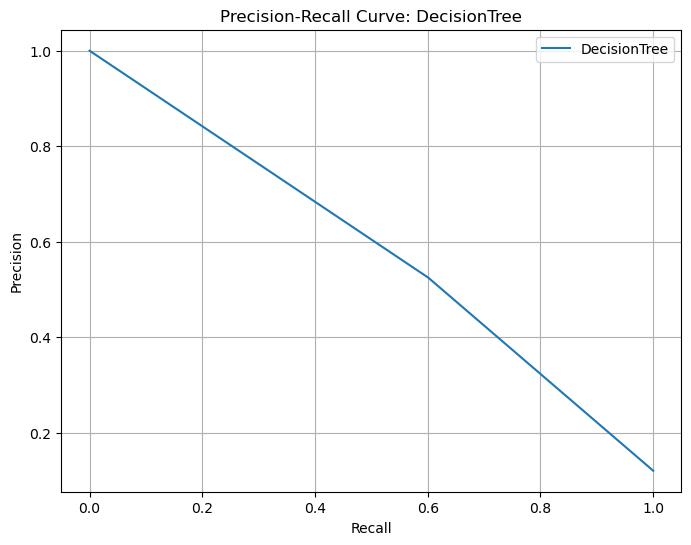

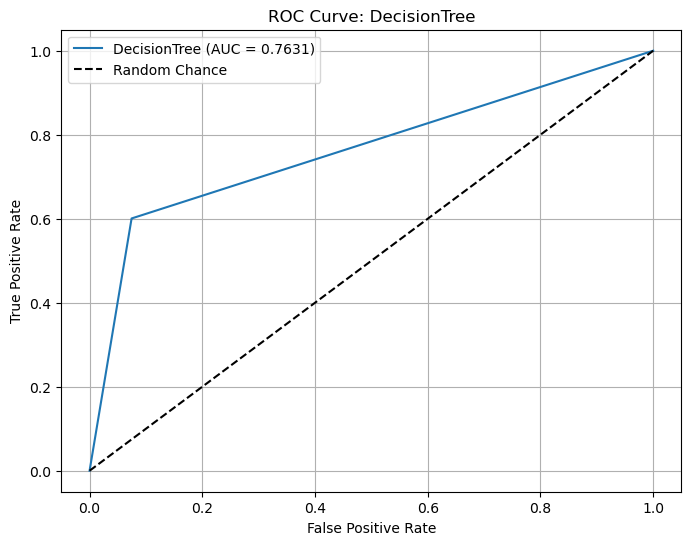


===== Model Evaluation: KNN =====
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.82      0.89    131902
           1       0.38      0.80      0.51     18098

    accuracy                           0.82    150000
   macro avg       0.67      0.81      0.70    150000
weighted avg       0.90      0.82      0.84    150000

Confusion Matrix:
[[108244  23658]
 [  3637  14461]]
ROC-AUC Score: 0.8688
Precision-Recall Curve (length=7 points)


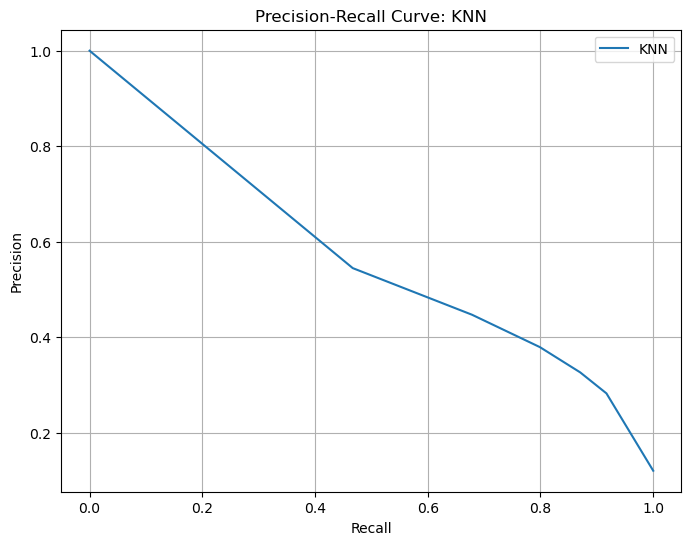

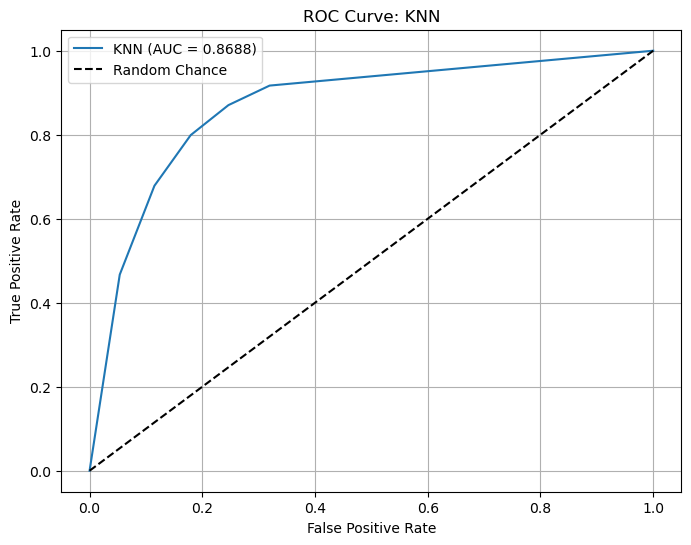


===== Model Evaluation: LinearSVC =====
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.80      0.89    131902
           1       0.40      0.94      0.56     18098

    accuracy                           0.82    150000
   macro avg       0.69      0.87      0.72    150000
weighted avg       0.92      0.82      0.85    150000

Confusion Matrix:
[[106113  25789]
 [  1070  17028]]
ROC-AUC Score: 0.9374
Precision-Recall Curve (length=150001 points)


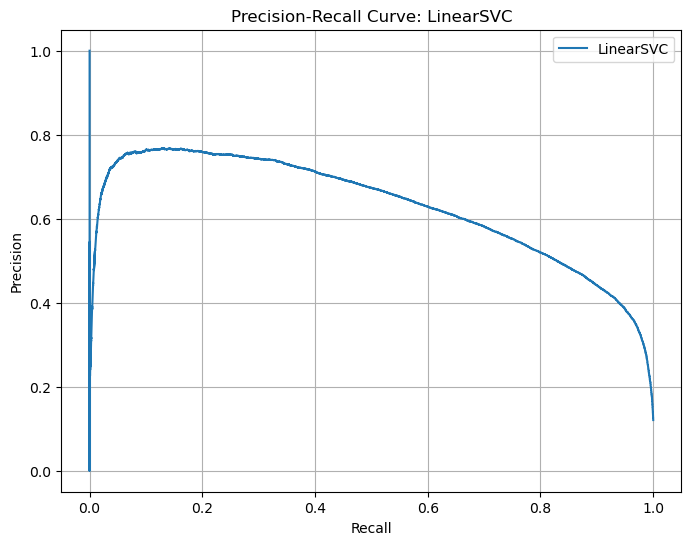

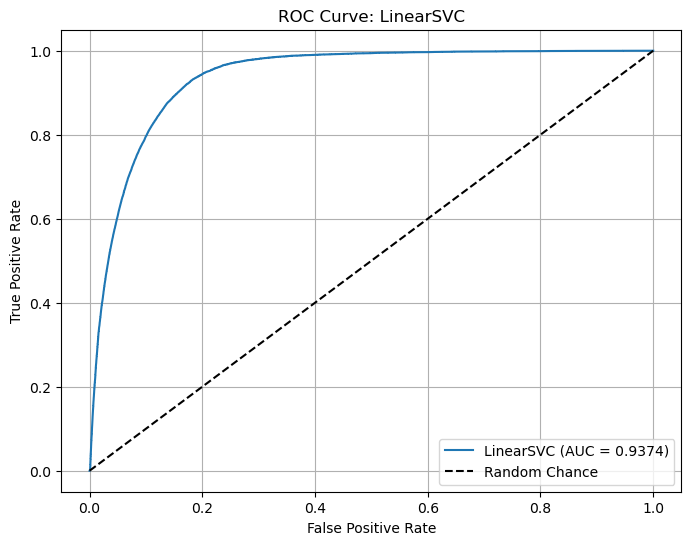


===== Model Evaluation: LogisticRegression =====
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.80      0.88    131902
           1       0.39      0.94      0.55     18098

    accuracy                           0.82    150000
   macro avg       0.69      0.87      0.72    150000
weighted avg       0.92      0.82      0.84    150000

Confusion Matrix:
[[105511  26391]
 [  1054  17044]]
ROC-AUC Score: 0.9365
Precision-Recall Curve (length=150001 points)


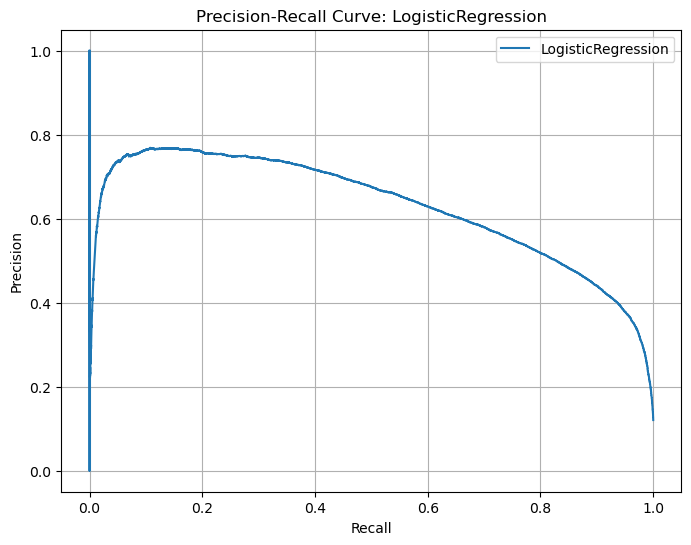

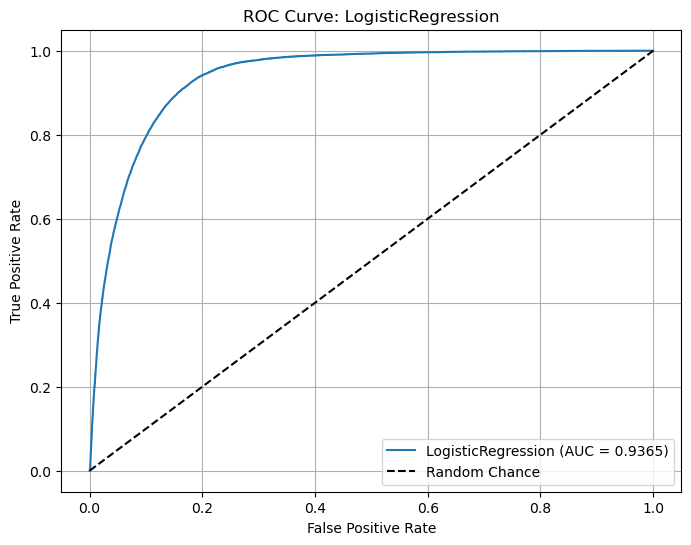


===== Model Evaluation: NaiveBayes =====
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.83      0.89    131902
           1       0.37      0.71      0.48     18098

    accuracy                           0.82    150000
   macro avg       0.66      0.77      0.69    150000
weighted avg       0.88      0.82      0.84    150000

Confusion Matrix:
[[110045  21857]
 [  5314  12784]]
ROC-AUC Score: 0.8236
Precision-Recall Curve (length=135088 points)


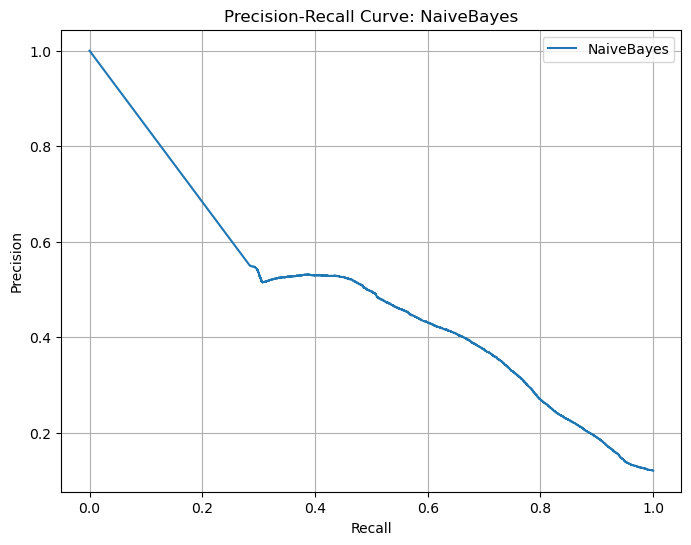

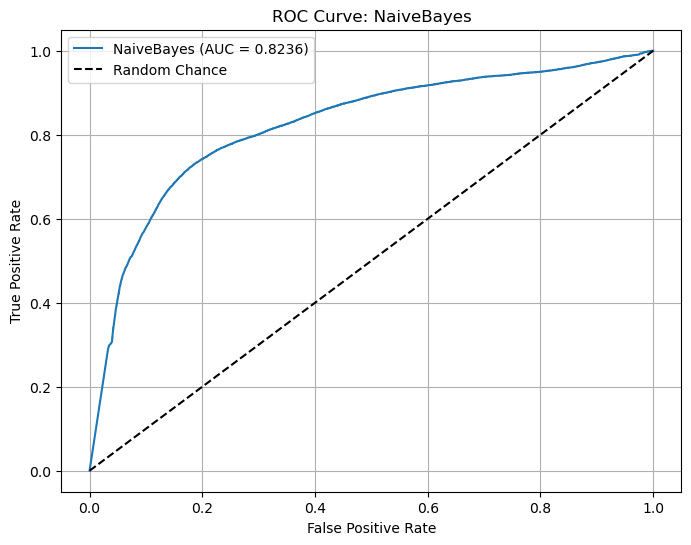


===== Model Evaluation: RandomForest =====
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95    131902
           1       0.64      0.66      0.65     18098

    accuracy                           0.91    150000
   macro avg       0.80      0.80      0.80    150000
weighted avg       0.92      0.91      0.91    150000

Confusion Matrix:
[[125261   6641]
 [  6224  11874]]
ROC-AUC Score: 0.9477
Precision-Recall Curve (length=126 points)


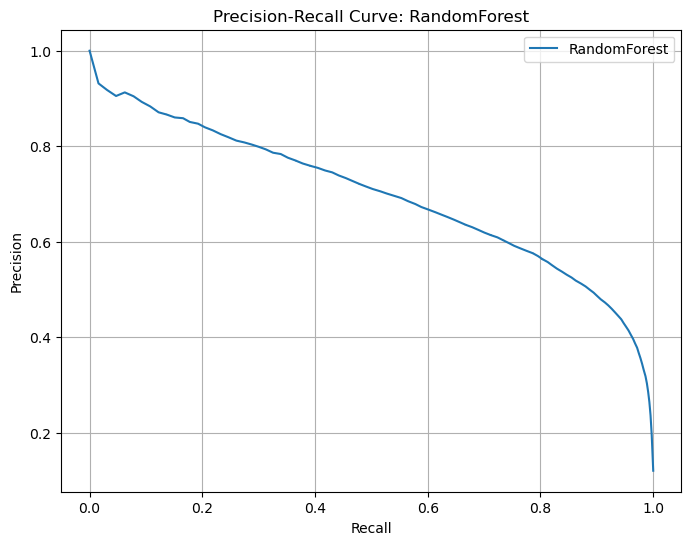

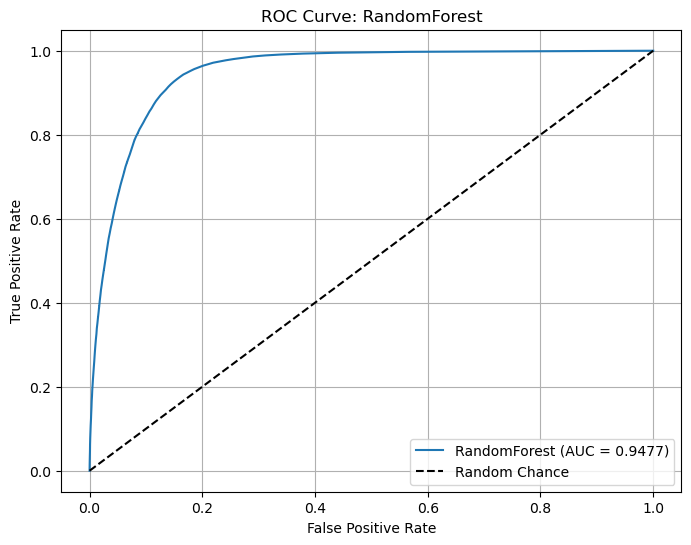

In [1]:
import os
import joblib
import matplotlib.pyplot as plt

from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    precision_recall_curve, roc_curve
)

# Loading test data
X_test = joblib.load("X_test.joblib")
y_test = joblib.load("y_test.joblib")

# Loading train data
X_train = joblib.load("X_train.joblib")
y_train = joblib.load("y_train.joblib")

# Loading models from base_models directory
model_dir = "base_models"
trained_models = {}

for file in os.listdir(model_dir):
    if file.endswith(".joblib"):
        model_name = file.replace(".joblib", "")
        model_path = os.path.join(model_dir, file)
        trained_models[model_name] = joblib.load(model_path)

# Evaluate each model
for model_name, model in trained_models.items():
    print(f"\n===== Model Evaluation: {model_name} =====")

    # Predict classes
    y_pred = model.predict(X_test)

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Checking if the model supports predict_proba
    if hasattr(model.named_steps['classifier'], "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        # fallback for models like LinearSVC
        try:
            y_score = model.decision_function(X_test)
            from sklearn.preprocessing import MinMaxScaler
            scaler = MinMaxScaler()
            y_prob = scaler.fit_transform(y_score.reshape(-1, 1)).flatten()
        except Exception as e:
            print(f" Could not compute probabilities for {model_name}: {e}")
            continue

    # ROC-AUC
    print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob):.4f}")

    # Precision-Recall Curve
    precision, recall, thresholds_pr = precision_recall_curve(y_test, y_prob)
    print(f"Precision-Recall Curve (length={len(precision)} points)")

    # ROC Curve
    fpr, tpr, thresholds_roc = roc_curve(y_test, y_prob)

    # Plot Precision-Recall Curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f"{model_name}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve: {model_name}")
    plt.legend()
    plt.grid()
    plt.show()

    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc_score(y_test, y_prob):.4f})")
    plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve: {model_name}")
    plt.legend()
    plt.grid()
    plt.show()


# Feature Importance


===== Feature Importance for DecisionTree =====
                  Feature  Importance
3           num__duration    0.506890
1            num__balance    0.093425
34   cat__contact_unknown    0.075205
2                num__day    0.061695
0                num__age    0.051108
4           num__campaign    0.034196
49  cat__poutcome_success    0.020220
29       cat__housing_yes    0.015423
42         cat__month_mar    0.008802
31          cat__loan_yes    0.007780


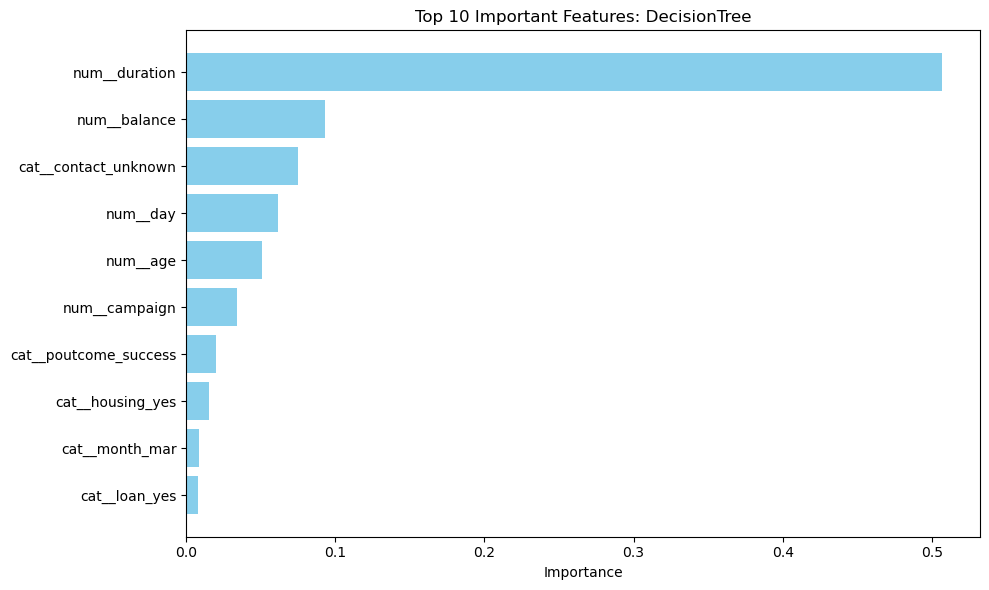


===== Feature Importance for KNN =====
 Feature importances not available for KNN

===== Feature Importance for LinearSVC =====
                  Feature  Importance
49  cat__poutcome_success    0.656583
42         cat__month_mar    0.574926
39         cat__month_jan    0.363809
45         cat__month_oct    0.360303
3           num__duration    0.349464
36         cat__month_aug    0.342259
44         cat__month_nov    0.329878
46         cat__month_sep    0.301182
34   cat__contact_unknown    0.298116
47  cat__poutcome_failure    0.288070


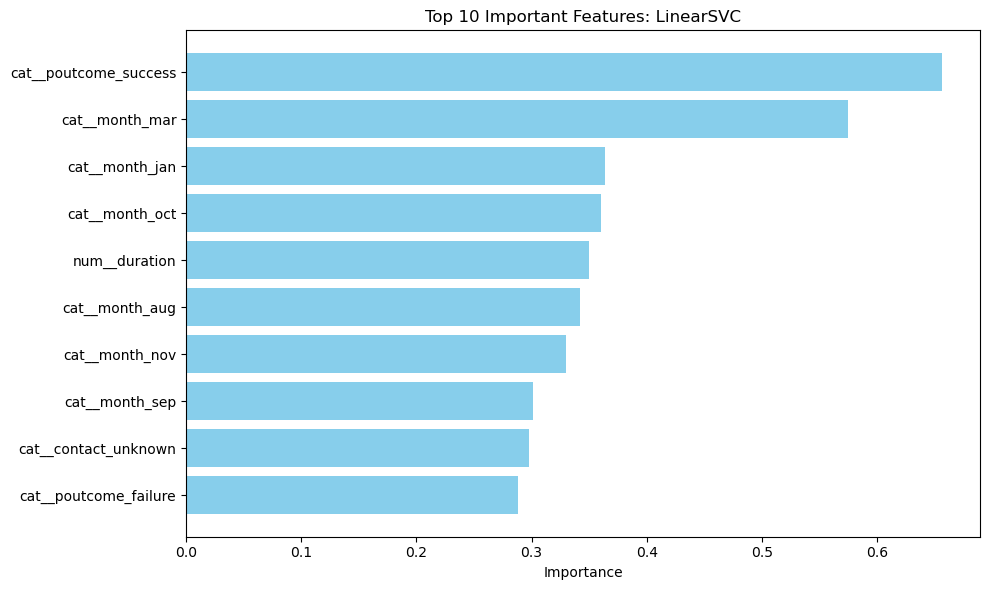


===== Feature Importance for LogisticRegression =====
                  Feature  Importance
49  cat__poutcome_success    2.086806
42         cat__month_mar    1.587946
45         cat__month_oct    0.993898
39         cat__month_jan    0.980786
36         cat__month_aug    0.903273
3           num__duration    0.902694
44         cat__month_nov    0.883676
47  cat__poutcome_failure    0.878781
46         cat__month_sep    0.860155
34   cat__contact_unknown    0.845938


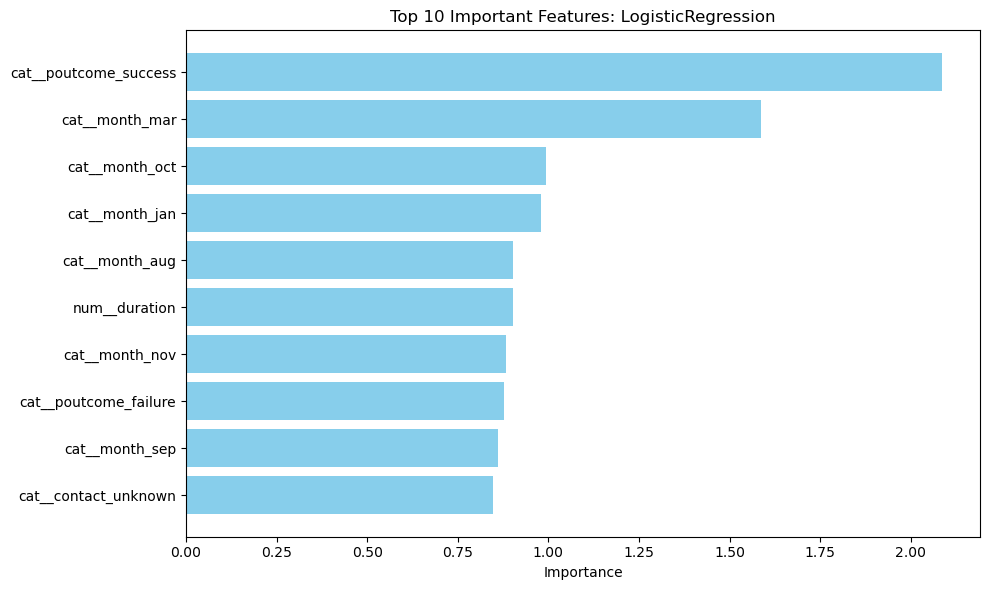


===== Feature Importance for NaiveBayes =====
 Feature importances not available for NaiveBayes

===== Feature Importance for RandomForest =====
                  Feature  Importance
3           num__duration    0.406413
1            num__balance    0.125074
2                num__day    0.062769
0                num__age    0.058975
4           num__campaign    0.049411
32  cat__contact_cellular    0.028253
49  cat__poutcome_success    0.024114
34   cat__contact_unknown    0.023543
29       cat__housing_yes    0.019109
28        cat__housing_no    0.017295


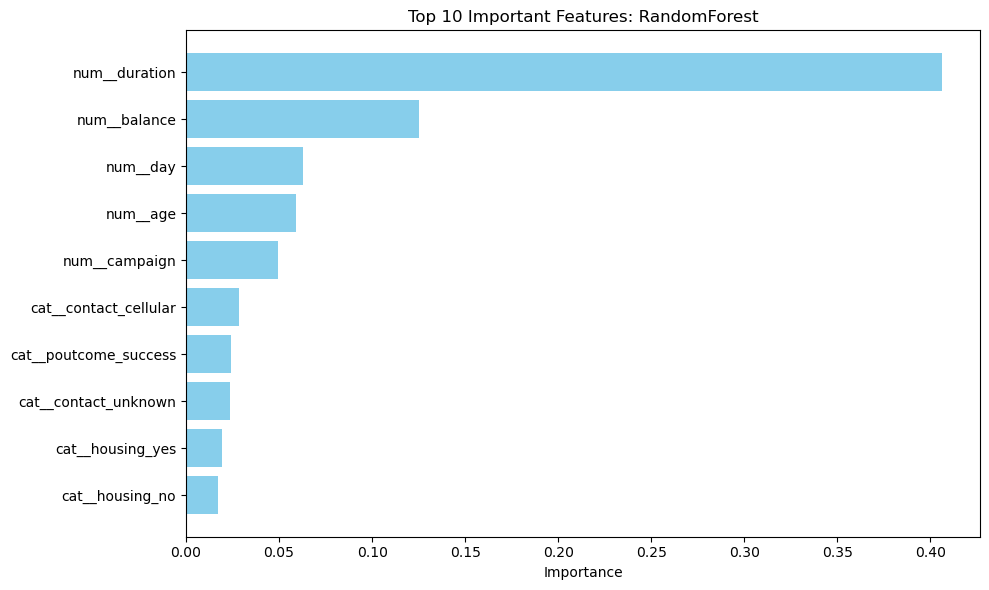

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



for name, model in trained_models.items():
    print(f"\n===== Feature Importance for {name} =====")
    
    try:
        # Get classifier
        clf = model.named_steps['classifier']
        
        # Get feature names from the preprocessor
        feature_names = model.named_steps['preprocessor'].get_feature_names_out()

        # Tree-based models
        if hasattr(clf, "feature_importances_"):
            importances = clf.feature_importances_

        # Linear models (e.g., LogisticRegression, LinearSVC)
        elif hasattr(clf, "coef_"):
            importances = np.abs(clf.coef_).flatten()

        else:
            print(f" Feature importances not available for {name}")
            continue

        # Create dataframe
        feature_df = pd.DataFrame({
            "Feature": feature_names,
            "Importance": importances
        })

        # Sort and display top 10
        top_features = feature_df.sort_values(by="Importance", ascending=False).head(10)
        print(top_features)

        # Plotting
        plt.figure(figsize=(10, 6))
        plt.barh(top_features["Feature"], top_features["Importance"], color='skyblue')
        plt.gca().invert_yaxis()
        plt.title(f"Top 10 Important Features: {name}")
        plt.xlabel("Importance")
        plt.tight_layout()
        plt.show()



    except Exception as e:
        print(f"Could not extract feature importances for {name}: {e}")


## HyperParameter tuning

### RandomsizedSearchCV

In [3]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import warnings
import joblib
import os

warnings.filterwarnings("ignore")  # optional: suppress convergence warnings

# Create directory to store saved models
os.makedirs("tuned_models", exist_ok=True)

# Define hyperparameter grids
param_grids = {
    'RandomForest': {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [None, 5, 10, 15],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'DecisionTree': {
        'classifier__max_depth': [None, 5, 10, 15],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__criterion': ['gini', 'entropy']
    },
    'LogisticRegression': {
        'classifier__C': np.logspace(-3, 3, 10),
        'classifier__penalty': ['l2'],
        'classifier__solver': ['lbfgs', 'liblinear']
    },
    'LinearSVC': {
        'classifier__C': np.logspace(-3, 3, 10),
        'classifier__max_iter': [1000, 2000, 5000]
    },
    'KNN': {
        'classifier__n_neighbors': [3, 5, 7, 9],
        'classifier__weights': ['uniform', 'distance']
    },
    'NaiveBayes': {
        # Few/no hyperparams to tune for GaussianNB
    }
}

# Store best models
best_models = {}

# Loop to tune and save
for name, model in trained_models.items():
    print(f"\n Tuning model: {name}")

    if name not in param_grids or not param_grids[name]:
        print(f"  No param grid defined for {name}, skipping tuning.")
        best_models[name] = model
    else:
        try:
            search = RandomizedSearchCV(
                estimator=model,
                param_distributions=param_grids[name],
                n_iter=10,
                scoring='roc_auc',
                cv=5,
                random_state=42,
                n_jobs=-1,
                verbose=1
            )
            search.fit(X_train, y_train)
            best_models[name] = search.best_estimator_

            print(f" Best ROC-AUC for {name}: {search.best_score_:.4f}")
            print(f"  Best Params: {search.best_params_}")

        except Exception as e:
            print(f" Failed to tune {name}: {e}")
            best_models[name] = model

    # Save the best model (either tuned or original)
    try:
        model_path = f"tuned_models/{name}.joblib"
        joblib.dump(best_models[name], model_path)
        print(f" Model saved to: {model_path}")
    except Exception as save_error:
        print(f" Failed to save model {name}: {save_error}")



 Tuning model: DecisionTree
Fitting 5 folds for each of 10 candidates, totalling 50 fits
 Best ROC-AUC for DecisionTree: 0.9376
  Best Params: {'classifier__min_samples_split': 2, 'classifier__max_depth': 10, 'classifier__criterion': 'entropy'}
 Model saved to: tuned_models/DecisionTree.joblib

 Tuning model: KNN
Fitting 5 folds for each of 8 candidates, totalling 40 fits
 Best ROC-AUC for KNN: 0.8309
  Best Params: {'classifier__weights': 'distance', 'classifier__n_neighbors': 9}
 Model saved to: tuned_models/KNN.joblib

 Tuning model: LinearSVC
Fitting 5 folds for each of 10 candidates, totalling 50 fits
 Best ROC-AUC for LinearSVC: 0.8612
  Best Params: {'classifier__max_iter': 1000, 'classifier__C': 0.001}
 Model saved to: tuned_models/LinearSVC.joblib

 Tuning model: LogisticRegression
Fitting 5 folds for each of 10 candidates, totalling 50 fits
 Best ROC-AUC for LogisticRegression: 0.8615
  Best Params: {'classifier__solver': 'liblinear', 'classifier__penalty': 'l2', 'classifier